### Benson Challenges

Note: Challenges should be solved using pandas. If you are looking for extra work, you're welcome to take a stab at solving them using only python dictionaries, but this is harder and avoiding this is the entire point of pandas!

#### Challenge 1   
  
- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Read them into a pandas dataframe (pd.read_csv()), format the columns nicely, and display the first few rows.   


In [1]:
import numpy as np
import pandas as pd

In [2]:
#Get five weeks of data
weeks = [180922, 180915, 180908, 180901, 180825]
url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
df_list = []
for week in weeks:
    df_list.append(pd.read_csv(url.format(week)))
df = pd.concat(df_list)    

In [3]:
#Check first few rows of df
df.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234,2291429
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251,2291453


In [4]:
#Check columns format
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [5]:
#Remove whitespace from column names
df.columns = [column.strip() for column in df.columns]

In [6]:
#Verify column names are clean
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
#Display first few rows
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234,2291429
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251,2291453
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,6759330,2291532
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,6759538,2291574


#### Challenge 2

- Let's turn this into a time series.

Create a new column that stores the date and time as a single pandas datetime object.

In [8]:
#Create a datetime column
df['DATETIME'] = pd.to_datetime(df['DATE'] +  df['TIME'], format='%m/%d/%Y%H:%M:%S')

In [9]:
#Check new datetime column
df['DATETIME'].head(7)

0   2018-09-15 00:00:00
1   2018-09-15 04:00:00
2   2018-09-15 08:00:00
3   2018-09-15 12:00:00
4   2018-09-15 16:00:00
5   2018-09-15 20:00:00
6   2018-09-16 00:00:00
Name: DATETIME, dtype: datetime64[ns]

#### Challenge 3

- These counts are for every n hours (What is n?). Also, there's something odd about these "counts", what is it? 
Do they actually represent total entries for a time period, or something else? We want total daily entries, create a new dataframe with one row per turnstile/day and a column that gives total daily entries.

The counts are for every four hours, but the counts are cumulative. To calculate total entries per turnstile/day we can subtract the starting entries count of tomorrow's value by the starting entries count of today's value: 

Tomorrow's starting count - Today's starting count = Today's daily count.

This should get us a reasonable estimate of entries per turnstile/day because turnstile audits seem to happen at midnight.
Before we can do this there is some cleaning necessary



In [10]:
#Check for unique identifier
(df.groupby(['C/A','UNIT','SCP','STATION','DATETIME'])
 ['ENTRIES'].count()
 .reset_index()
 .sort_values('ENTRIES',ascending=False)
 .head())


,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
53676,A060,R001,00-00-01,WHITEHALL S-FRY,2018-09-14 05:00:00,2
53459,A060,R001,00-00-00,WHITEHALL S-FRY,2018-09-14 05:00:00,2
0,A002,R051,02-00-00,59 ST,2018-08-18 00:00:00,1
658508,R145,R032,00-00-00,TIMES SQ-42 ST,2018-09-19 12:00:00,1
658497,R145,R032,00-00-00,TIMES SQ-42 ST,2018-09-18 00:00:00,1


In [11]:
#Check the duplicates
dup1 = ((df['C/A']=='A060') &
        (df['UNIT']=='R001') &
        (df['SCP']=='00-00-01') &
        (df['STATION']=='WHITEHALL S-FRY') &
        (df['DATETIME'].dt.date==pd.to_datetime('2018-09-14').date()))
    
df[dup1].head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
10694,A060,R001,00-00-01,WHITEHALL S-FRY,R1W,BMT,09/14/2018,01:00:00,REGULAR,2969295,1965636,2018-09-14 01:00:00
10695,A060,R001,00-00-01,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,REGULAR,2969337,1965665,2018-09-14 05:00:00
10696,A060,R001,00-00-01,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,RECOVR AUD,2969335,1965665,2018-09-14 05:00:00


In [12]:
dup2 = ((df['C/A']=='A060') &
        (df['UNIT']=='R001') &
        (df['SCP']=='00-00-00') &
        (df['STATION']=='WHITEHALL S-FRY') &
        (df['DATETIME'].dt.date==pd.to_datetime('2018-09-14').date()))
    
df[dup2].head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
10651,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,09/14/2018,01:00:00,REGULAR,3612787,2401262,2018-09-14 01:00:00
10652,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,REGULAR,3612847,2401282,2018-09-14 05:00:00
10653,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,RECOVR AUD,3612845,2401282,2018-09-14 05:00:00


The duplicates are occuring during recovery audits. We only have two duplicates and it shouldn't make a difference for our daily counts, so we will remove the duplicates now.

In [13]:
#Drop duplicates
df.drop_duplicates(subset=['C/A','UNIT','SCP','STATION','DATETIME'],inplace=True)

In [14]:
#Verify no more duplicates
(df.groupby(['C/A','UNIT','SCP','STATION','DATETIME'])
 ['ENTRIES'].count()
 .reset_index()
 .sort_values('ENTRIES',ascending=False)
 .head())


,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-08-18 00:00:00,1
658463,R145,R032,00-00-00,TIMES SQ-42 ST,2018-09-12 08:00:00,1
658495,R145,R032,00-00-00,TIMES SQ-42 ST,2018-09-17 16:00:00,1
658496,R145,R032,00-00-00,TIMES SQ-42 ST,2018-09-17 20:00:00,1
658497,R145,R032,00-00-00,TIMES SQ-42 ST,2018-09-18 00:00:00,1


In [15]:
#Create a new df with the first entries value of the day for each turnstile/day
df.sort_values(by='DATETIME',inplace=True)
daily_df = (df
           .groupby(['C/A','UNIT','SCP','STATION','DATE'],as_index=False)
           ['ENTRIES'].first())

In [16]:
#Check the new df
daily_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/18/2018,6728354
1,A002,R051,02-00-00,59 ST,08/19/2018,6728970
2,A002,R051,02-00-00,59 ST,08/20/2018,6729479
3,A002,R051,02-00-00,59 ST,08/21/2018,6730772
4,A002,R051,02-00-00,59 ST,08/22/2018,6732070


In [17]:
#Create two new columns, one for tomorrow's date and one for tomorrows first entries count
#To later calculate current days total entries, we will subtract tomorrow first entry count by the current days
daily_df[['TOM_DATE','TOM_ENTRIES']] = (daily_df
                                         .groupby(['C/A','UNIT','SCP','STATION'])['DATE','ENTRIES']
                                         .transform(lambda x: x.shift(-1)))

In [18]:
#Verify we got the right values in the new columns
daily_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,TOM_DATE,TOM_ENTRIES
0,A002,R051,02-00-00,59 ST,08/18/2018,6728354,08/19/2018,6728970.0
1,A002,R051,02-00-00,59 ST,08/19/2018,6728970,08/20/2018,6729479.0
2,A002,R051,02-00-00,59 ST,08/20/2018,6729479,08/21/2018,6730772.0
3,A002,R051,02-00-00,59 ST,08/21/2018,6730772,08/22/2018,6732070.0
4,A002,R051,02-00-00,59 ST,08/22/2018,6732070,08/23/2018,6733446.0


In [19]:
#Check how many null values we have
daily_df.TOM_ENTRIES.isnull().sum()

4728

In [20]:
#Verify we have just one null value for each turnstile (the last date will have no values for the next day)
(df.groupby(['C/A','UNIT','SCP','STATION'])
 ['ENTRIES'].count()
 .reset_index()
 .sort_values('ENTRIES',ascending=False)
 .count())

C/A        4728
UNIT       4728
SCP        4728
STATION    4728
ENTRIES    4728
dtype: int64

In [21]:
#Drop rows will null TOM_ENTRIES values
daily_df.dropna(subset=['TOM_ENTRIES'], inplace=True)

In [22]:
#We should be able to subtract tomorrow's starting count by today's starting count to
#get an accurate number of entries per turnstile for today
daily_df['DAILY_ENTRIES'] = (daily_df['TOM_ENTRIES'] - daily_df['ENTRIES'])

In [23]:
#Check the entries numbers we calculated
daily_df.DAILY_ENTRIES.describe()

count    1.589720e+05
mean    -1.133232e+04
std      4.121209e+06
min     -1.448534e+09
25%      2.240000e+02
50%      7.330000e+02
75%      1.464000e+03
max      3.175323e+08
Name: DAILY_ENTRIES, dtype: float64

In [24]:
#Our DAILY_ENTIRES column calculated many negative values, and some very large numbers
#First we take a look at the negative entries
daily_df[daily_df['ENTRIES'] > daily_df['TOM_ENTRIES']].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,TOM_DATE,TOM_ENTRIES,DAILY_ENTRIES
786,A007,R079,01-06-00,5 AV/59 ST,09/03/2018,3408576,09/04/2018,458806.0,-2949770.0
1190,A011,R080,01-00-00,57 ST-7 AV,08/18/2018,885886508,08/19/2018,885886236.0,-272.0
1191,A011,R080,01-00-00,57 ST-7 AV,08/19/2018,885886236,08/20/2018,885886019.0,-217.0
1192,A011,R080,01-00-00,57 ST-7 AV,08/20/2018,885886019,08/21/2018,885885561.0,-458.0
1193,A011,R080,01-00-00,57 ST-7 AV,08/21/2018,885885561,08/22/2018,885885033.0,-528.0


In [25]:
#It looks like some of the issues we had with negative counters comes form turnstiles counting in reverse
#Check how many negative counts we have
daily_df[daily_df['ENTRIES'] > daily_df['TOM_ENTRIES']].shape

(1384, 9)

In [26]:
#Taking an absolute value will help with the reverse counting. Let's see what counts we get after factoring
#for reverse counters
daily_df['DAILY_ENTRIES'] = abs(daily_df['TOM_ENTRIES'] - daily_df['ENTRIES'])
daily_df.DAILY_ENTRIES.describe()

count    1.589720e+05
mean     1.783377e+04
std      4.121186e+06
min      0.000000e+00
25%      2.400000e+02
50%      7.480000e+02
75%      1.485000e+03
max      1.448534e+09
Name: DAILY_ENTRIES, dtype: float64

In [27]:
#The absolute values helped, but we still have some very large counts
#Let's look at some of the large counts
daily_df[daily_df['DAILY_ENTRIES'] > 500000].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,TOM_DATE,TOM_ENTRIES,DAILY_ENTRIES
786,A007,R079,01-06-00,5 AV/59 ST,09/03/2018,3408576,09/04/2018,458806.0,2949770.0
10850,A084,R125,01-03-01,BROAD ST,08/20/2018,1813694,08/21/2018,1287.0,1812407.0
12381,B018,R184,00-00-00,CORTELYOU RD,09/15/2018,15832652,09/16/2018,1525.0,15831127.0
23847,G009,R151,02-00-05,CONEY IS-STILLW,08/24/2018,3956142,08/25/2018,419.0,3955723.0
26548,H019,R294,00-00-00,MORGAN AV,09/01/2018,15071100,09/02/2018,89.0,15071011.0


In [28]:
#It looks like some of the counters are reseting.
#One way to factor that in would be to just use the min value between the current count and tomorrow's count
#Define a function that incorporate the abs difference between tomorrow's starting count by today's starting count
#along with using the min of the two values when we have a large number. If we still have a large count
#just set it to zero for now.
def daily_counts(row, max_count):
    counter = abs(row['TOM_ENTRIES'] - row['ENTRIES'])
    if counter > max_count:
        counter = min(row['TOM_ENTRIES'], row['ENTRIES'])
    if counter > max_count:
        return 0
    return counter
daily_df['DAILY_ENTRIES'] = daily_df.apply(daily_counts, axis=1, max_count=50000)

In [29]:
#Take a look at our new counts
daily_df.DAILY_ENTRIES.describe()

count    158972.000000
mean       1003.541190
std        1028.323478
min           0.000000
25%         240.000000
50%         747.000000
75%        1484.000000
max       49096.000000
Name: DAILY_ENTRIES, dtype: float64

In [30]:
daily_df[daily_df['DAILY_ENTRIES'] > 25000]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,TOM_DATE,TOM_ENTRIES,DAILY_ENTRIES
32488,JFK02,R535,01-00-03,HOWARD BCH JFK,08/28/2018,27208,08/29/2018,5.0,27203.0
32777,JFK03,R536,00-00-05,JFK JAMAICA CT1,09/20/2018,41792,09/21/2018,668.0,41124.0
75169,N500,R020,00-00-00,47-50 STS ROCK,08/31/2018,27735,09/01/2018,1298.0,26437.0
90278,PTH01,R549,00-00-02,NEWARK HW BMEBE,09/20/2018,41955,09/21/2018,93.0,41862.0
92738,PTH04,R551,00-04-06,GROVE STREET,09/11/2018,31779,09/12/2018,0.0,31779.0
94180,PTH07,R550,00-00-04,CITY / BUS,08/20/2018,50112,08/21/2018,1016.0,49096.0
98015,PTH18,R549,01-00-04,NEWARK BM BW,08/21/2018,43911,08/22/2018,734.0,43177.0
98725,PTH19,R549,02-01-01,NEWARK C,08/31/2018,30583,09/01/2018,319.0,30264.0
117722,R192,R039,00-06-00,MARBLE HILL-225,09/14/2018,44920,09/15/2018,589978.0,44920.0


We see the majority of our turnstile counts below 1500 which seems reasonable for one turnstile per day. We have a few turnstiles over 25000 entries/day which seems unusual, but we can clear those later too if necessary.

#### Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Extract a list of dates and a list of counts from the dataframe, 
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)



In [31]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
#isolate a single turnstile to answer challenge 4
turnstile = ((daily_df['C/A']=='A002') &
            (daily_df['UNIT']=='R051') &
            (daily_df['SCP']=='02-00-00') &
            (daily_df['STATION']=='59 ST'))

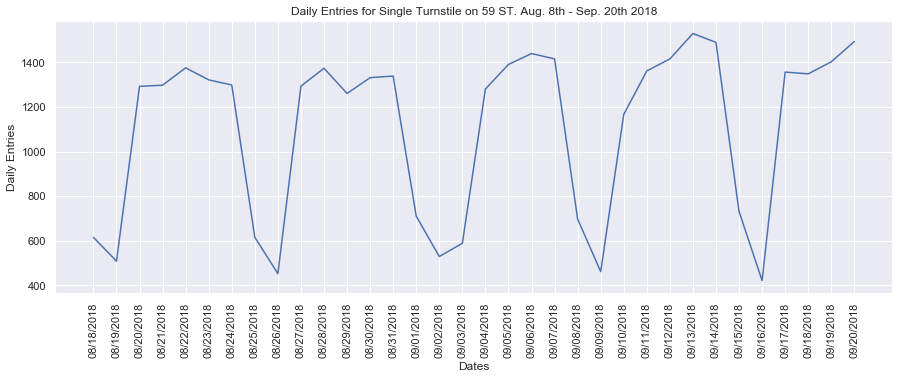

In [33]:
#Generate the list of dates from the DataFrame
#Generate a list of counts for the single turnstile
#Plot
dates = daily_df['DATE'].unique()
counts = daily_df[turnstile]['DAILY_ENTRIES']
plt.figure(figsize=(15,5))
plt.plot(dates,counts)
plt.xticks(dates, rotation='vertical')
plt.title('Daily Entries for Single Turnstile on 59 ST. Aug. 8th - Sep. 20th 2018')
plt.xlabel('Dates')
plt.ylabel('Daily Entries');

We see a major drop in daily entries on Saturday's and Sunday's. We see a major drop continue on a Monday(9/3), but that was Labor day so the dip makes sense.

#### Challenge 5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.

In [34]:
#Groupby ControlArea/UNIT/STATION and sum the counts from each turnstile within the combo per day
combined_counts = daily_df.groupby(['C/A','UNIT','STATION','DATE'], as_index=False)['DAILY_ENTRIES'].sum()
combined_counts.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,08/18/2018,7819.0
1,A002,R051,59 ST,08/19/2018,6263.0
2,A002,R051,59 ST,08/20/2018,11757.0
3,A002,R051,59 ST,08/21/2018,12459.0
4,A002,R051,59 ST,08/22/2018,12734.0


#### Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

In [35]:
#Same approach, combine by station
station_counts = daily_df.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
station_counts.head()

STATION  DATE      
1 AV     08/18/2018    12719.0
         08/19/2018    10274.0
         08/20/2018    17181.0
         08/21/2018    18318.0
         08/22/2018    18776.0
Name: DAILY_ENTRIES, dtype: float64

#### Challenge 7

Plot the time series for a station.

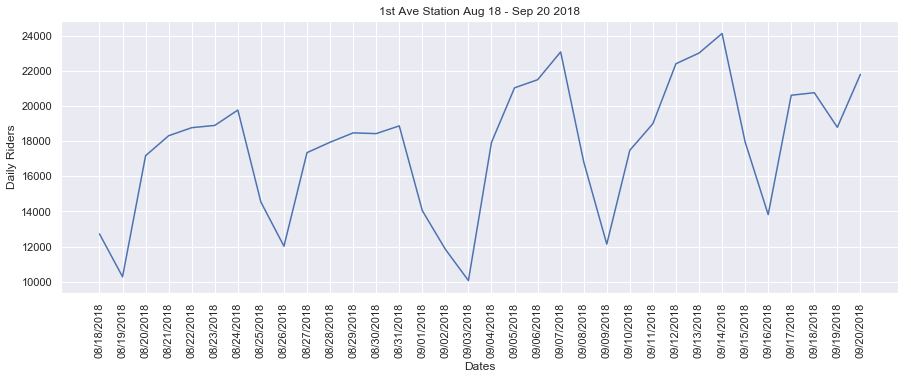

In [36]:
#Generate a list of dates and select 1st av station from the station_counts and plot
dates = daily_df['DATE'].unique()
station = station_counts['1 AV']
plt.figure(figsize=(15,5))
plt.plot(dates,station)
plt.xticks(dates, rotation='vertical')
plt.xlabel('Dates')
plt.ylabel('Daily Riders')
plt.title('1st Ave Station Aug 18 - Sep 20 2018');

#### Challenge 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.


In [37]:
#Check which dates we're working with
dates = daily_df['DATE'].unique()
dates

array(['08/18/2018', '08/19/2018', '08/20/2018', '08/21/2018',
       '08/22/2018', '08/23/2018', '08/24/2018', '08/25/2018',
       '08/26/2018', '08/27/2018', '08/28/2018', '08/29/2018',
       '08/30/2018', '08/31/2018', '09/01/2018', '09/02/2018',
       '09/03/2018', '09/04/2018', '09/05/2018', '09/06/2018',
       '09/07/2018', '09/08/2018', '09/09/2018', '09/10/2018',
       '09/11/2018', '09/12/2018', '09/13/2018', '09/14/2018',
       '09/15/2018', '09/16/2018', '09/17/2018', '09/18/2018',
       '09/19/2018', '09/20/2018'], dtype=object)

In [38]:
#Create four lists, each containing the counts for one week (Mon-Sun) for one station
station = station_counts['1 AV']
week_one = station[2:9].values
week_two = station[9:16].values
week_three = station[16:23].values
week_four = station[23:30].values

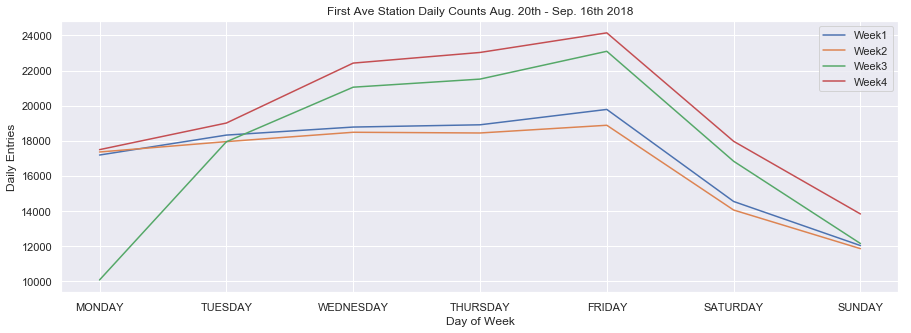

In [39]:
#Plot each list on the same axs, Label each day of the week
plt.figure(figsize=(15,5))
plt.plot(week_one)
plt.plot(week_two)
plt.plot(week_three)
plt.plot(week_four)
plt.xticks(range(7),['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY'])
plt.title('First Ave Station Daily Counts Aug. 20th - Sep. 16th 2018')
plt.xlabel('Day of Week')
plt.ylabel('Daily Entries')
plt.legend(['Week1','Week2','Week3','Week4']);

Week 3 includes Labor day so it makes sense that Monday has a low count. Week 3 and Week 4 are also the first two weeks of September so that can also explain why they have larger counts than week 1 and 2.

#### Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [40]:
#Create a new series using all daily entries per station for all dates
station_totals = station_counts.groupby('STATION').sum()
station_totals.head()

STATION
1 AV             601986.0
103 ST           852920.0
103 ST-CORONA    551032.0
104 ST            84339.0
110 ST           292941.0
Name: DAILY_ENTRIES, dtype: float64

In [41]:
#Sort by highest counts over time period to find most popular stations
station_totals.sort_values(ascending=False).head(10)

STATION
34 ST-PENN STA     4609927.0
GRD CNTRL-42 ST    4069279.0
34 ST-HERALD SQ    3486934.0
TIMES SQ-42 ST     3008599.0
42 ST-PORT AUTH    2978255.0
14 ST-UNION SQ     2976965.0
23 ST              2885734.0
FULTON ST          2748991.0
CANAL ST           2299390.0
125 ST             2244771.0
Name: DAILY_ENTRIES, dtype: float64

#### Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)


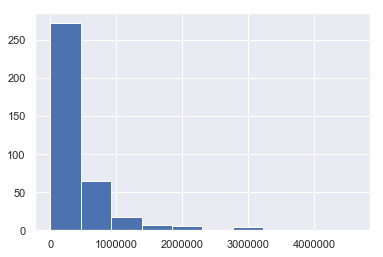

In [42]:
#Plot hist of the station totals
total_ridership_counts = station_totals
plt.hist(total_ridership_counts);

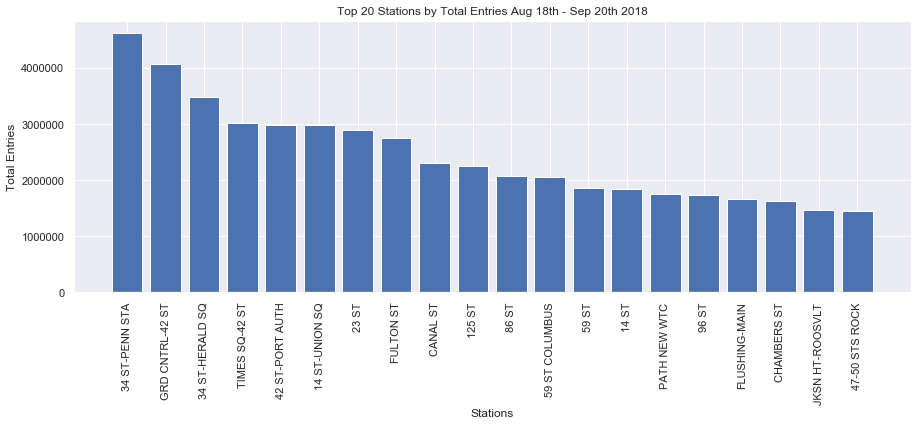

In [43]:
#Sort station totals in descending order and select the top 20 to plot
top_20_stations = station_totals.sort_values(ascending=False).head(20)
plt.figure(figsize=(15,5))
plt.bar(top_20_stations.index, top_20_stations)
plt.xticks(rotation='vertical')
plt.xlabel('Stations')
plt.ylabel('Total Entries')
plt.title('Top 20 Stations by Total Entries Aug 18th - Sep 20th 2018');